In [1]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import division

import math
import random
from functools import partial

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from JSAnimation import IPython_display

import numpy as np

from sklearn import datasets as ds

For description of make_regression function please see http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html

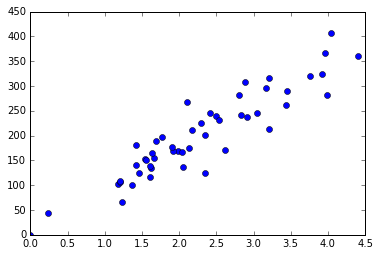

In [3]:
x, y = ds.make_regression(n_samples=50, n_features=1, noise=40.0, random_state=1)

x[:, 0] += math.fabs(x.min())
y += math.fabs(y.min())

plt.plot(x[:,0], y, 'o')

In [4]:
def linear_least_squares(x, y):
    x_len = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_x2 = np.sum([i ** 2 for i in x])
    sum_xy = np.sum([i * j for (i, j) in zip(x, y)])
    a = (x_len * sum_xy - sum_x * sum_y) / (x_len * sum_x2 - sum_x ** 2)
    b = (sum_y - a * sum_x) / x_len

    return a, b
    

In [5]:
w1, w0 = linear_least_squares(x, y)

In [6]:
fit_func = w1 * x[:, 0] + w0

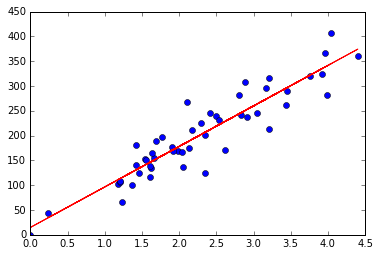

In [7]:
plt.plot(x, y, 'bo')
plt.plot(x, fit_func, 'r-')

In [8]:
x_grad = np.ones(shape=(len(x) , 2))
x_grad[:, 1] = x[:, 0]
y_grad = y.reshape(len(y), 1)
theta = np.zeros(shape=(2, 1))

$$
J(\theta{}_0, \theta{}_1, ..., \theta{}_n) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2
$$

$$
h_{\theta}(x) = \theta{}_0 * x_0 + \theta{}_1 * x_1 + ... + \theta{}_n * x_n
$$

- n - number of features
- m - number of samples
- h - hypothesis
- $x_i^j$ - values of feature j in sample i

$$
\theta{}_j = \theta{}_j - \alpha{} \frac{\delta{}}{\delta{}\theta{}_j}J(\theta{}_0, \theta{}_1,...\theta{}_n)
$$

$$
\theta{}_j = \theta{}_j - \alpha{} \frac{1}{m} \sum_{i=1}^{m} (h_\theta{}(x^{(i)}) - y^{(i)})x^{(i)}
$$

In [9]:
def batch_gradient_descent(x, y, theta, step, num_iters):
    m = float(len(y))

    xt = x.T
    coef = float(step) * (1.0 / m)
    
    theta_hist = []
    cost_hist = []
    
    for i in range(num_iters):
        theta_hist.append(tuple(theta.flatten()))
        
        hypothesis = x.dot(theta)
        loss = hypothesis - y

        cost_hist.append(np.sum(loss**2) / (2.0 * m))
        
        theta = theta - xt.dot(loss) * coef

    result = tuple(theta.flatten())
    theta_hist.append(result)
    return result, theta_hist, cost_hist

In [10]:
(w0_grad, w1_grad), theta_hist, cost_hist = batch_gradient_descent(x_grad, y_grad, theta, 0.005, 100)

In [11]:
grad_fit_func = w1_grad * x[:, 0] + w0_grad


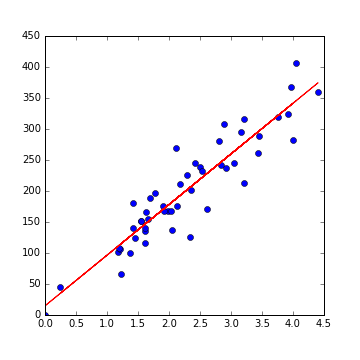
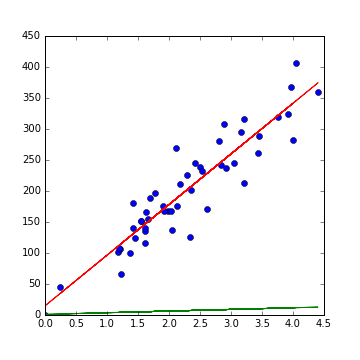
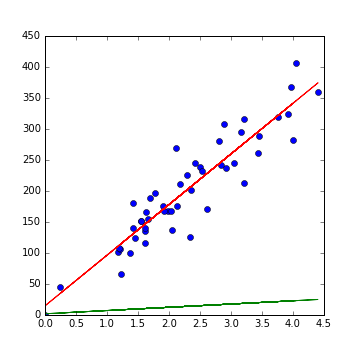
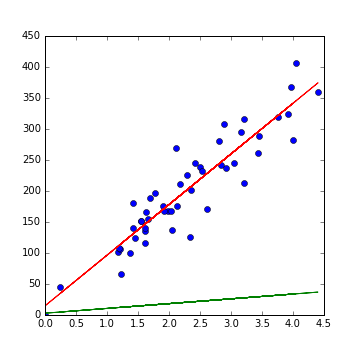
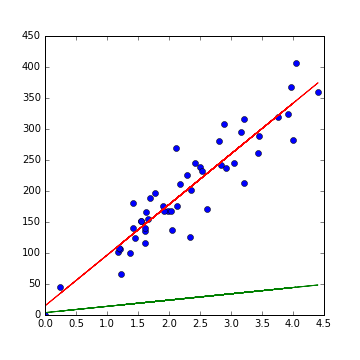
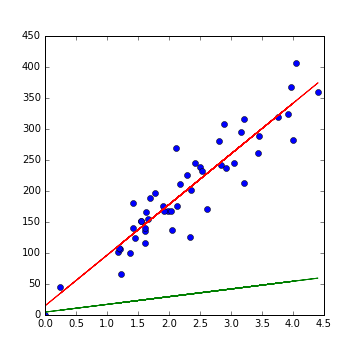
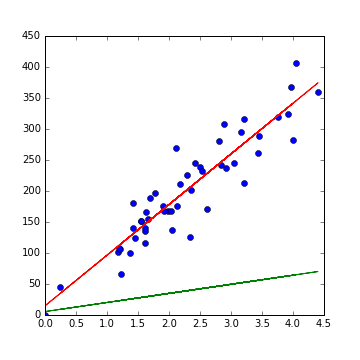
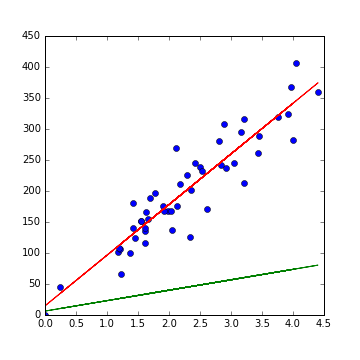
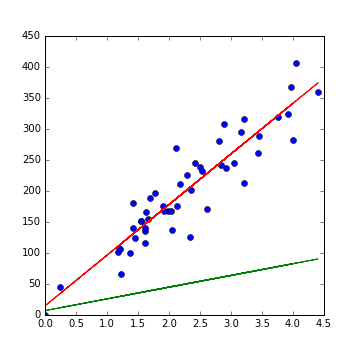
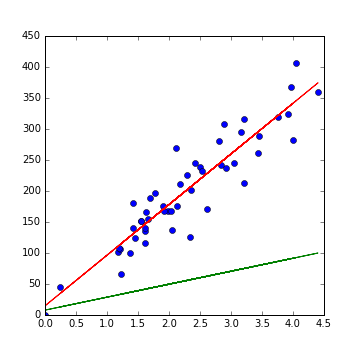
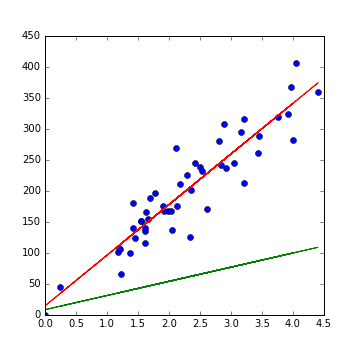
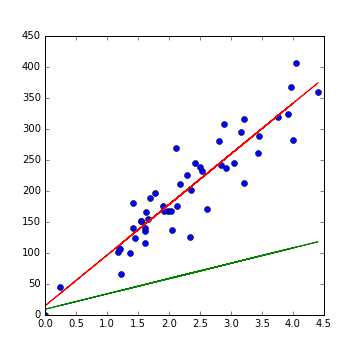
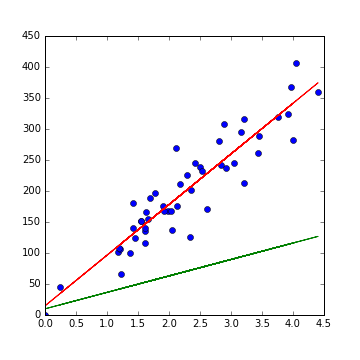
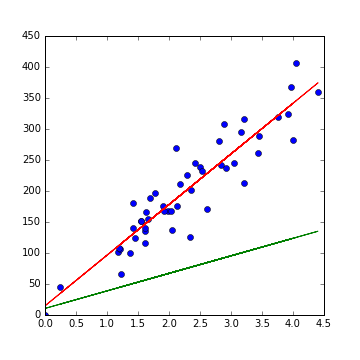
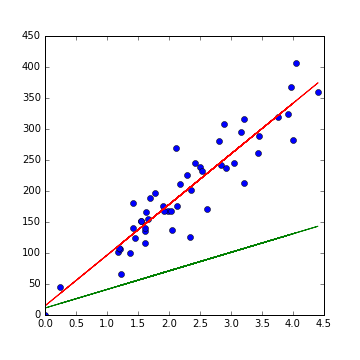
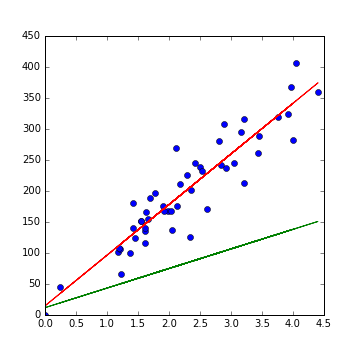
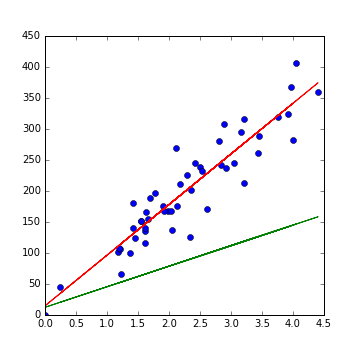
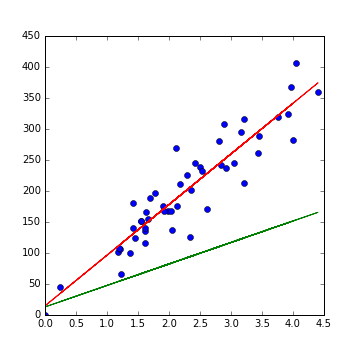
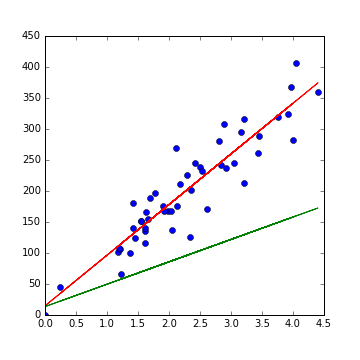
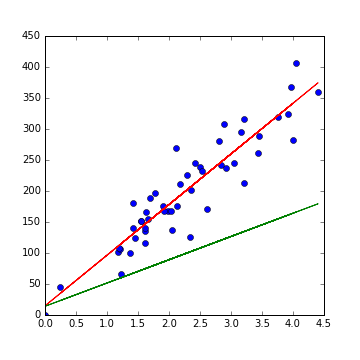
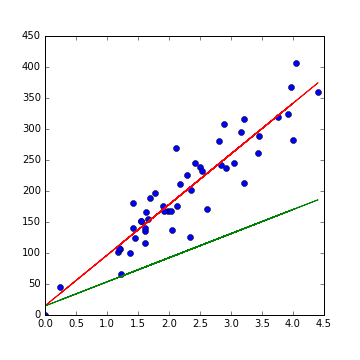
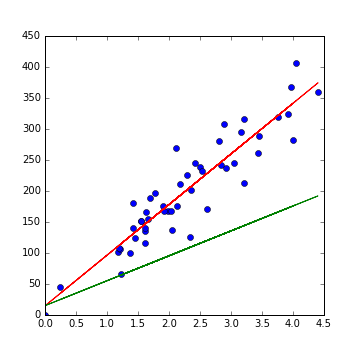
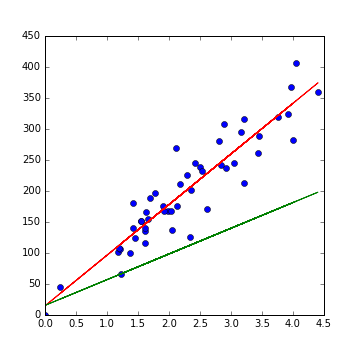
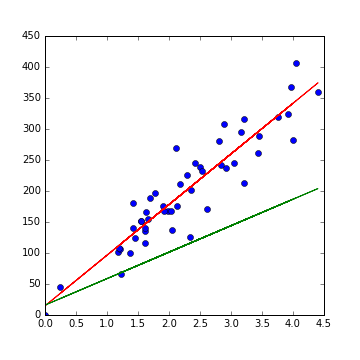
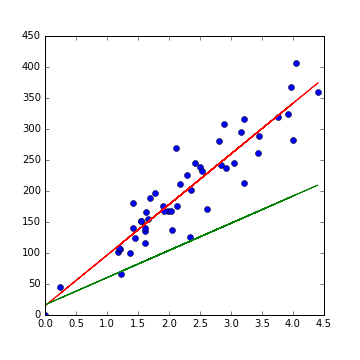
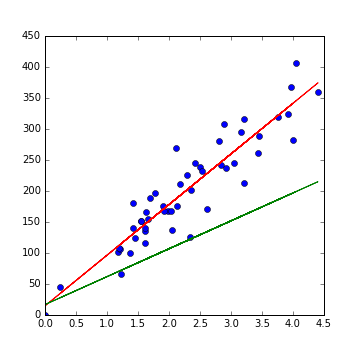
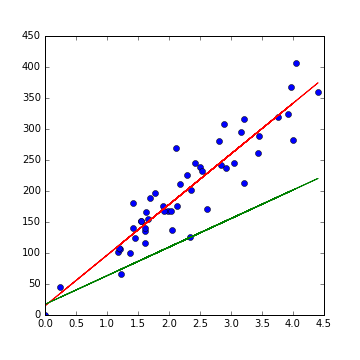
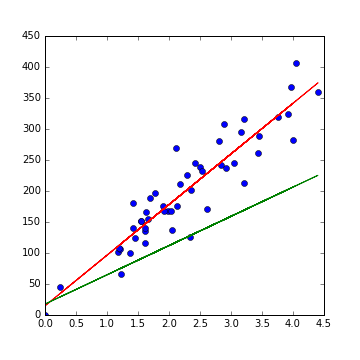
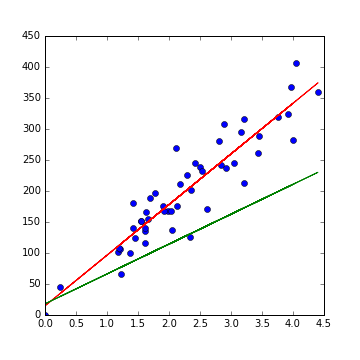
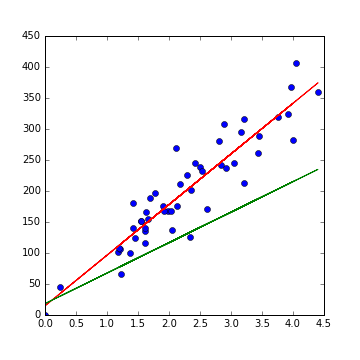
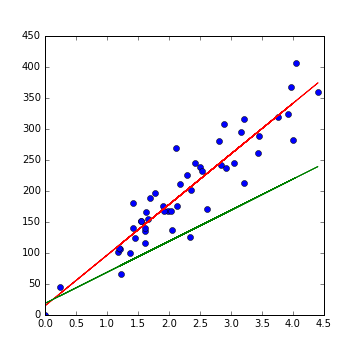
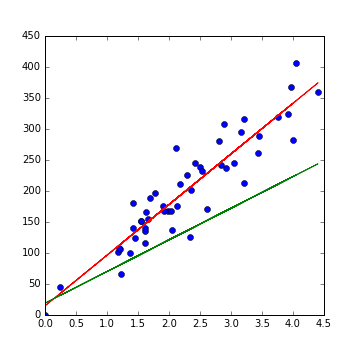
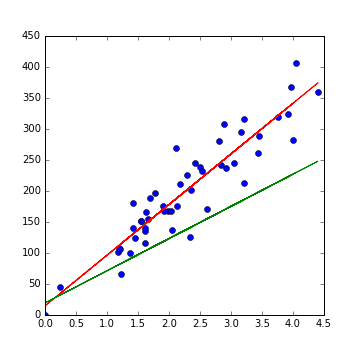
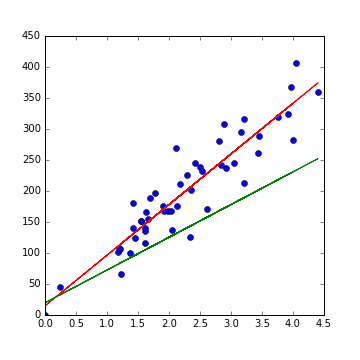
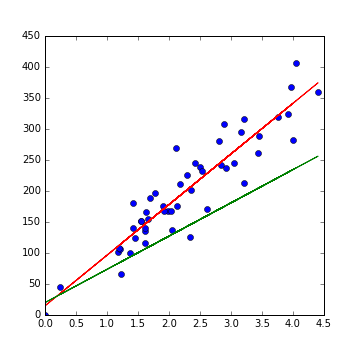
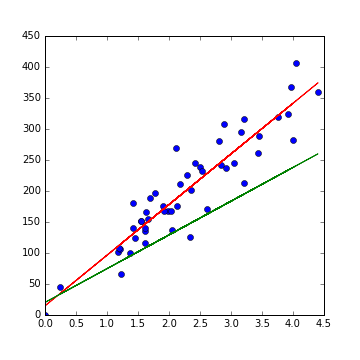
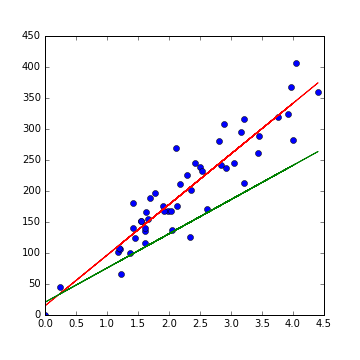
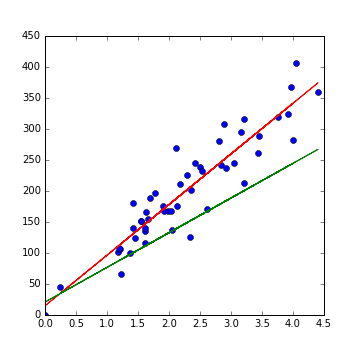
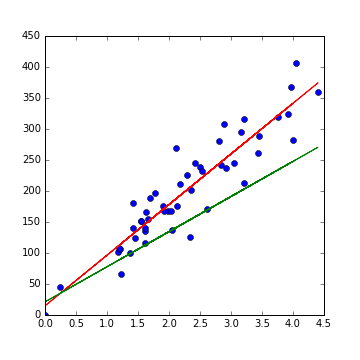
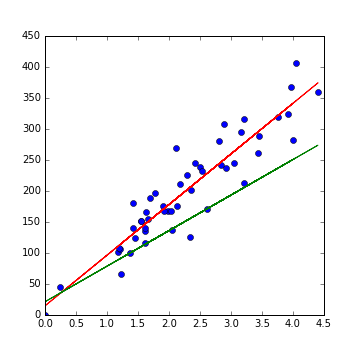
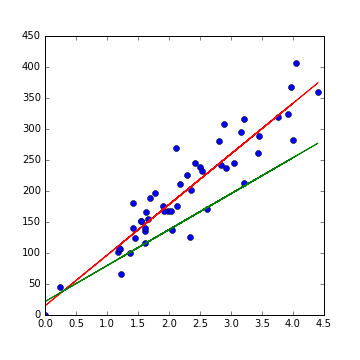
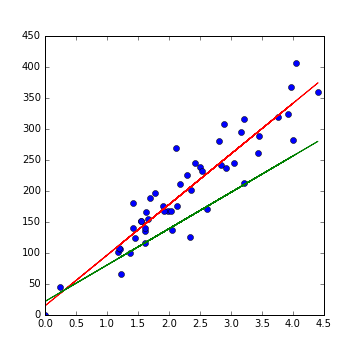
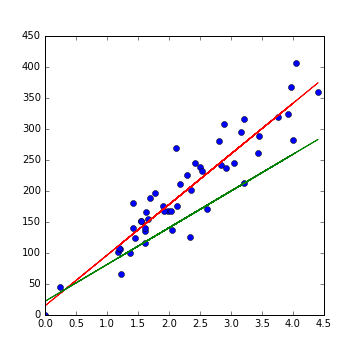
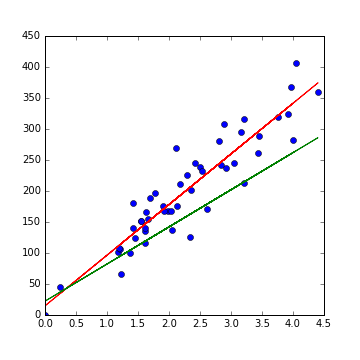
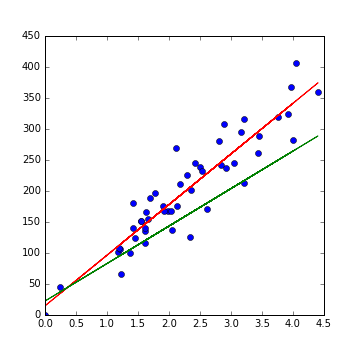
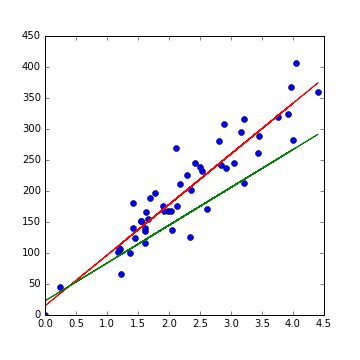
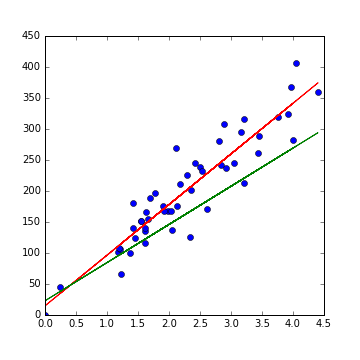
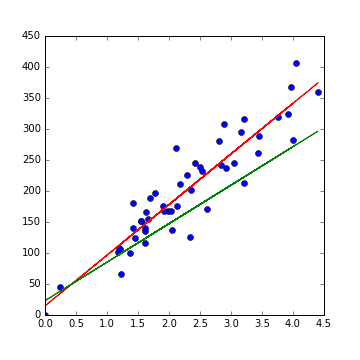
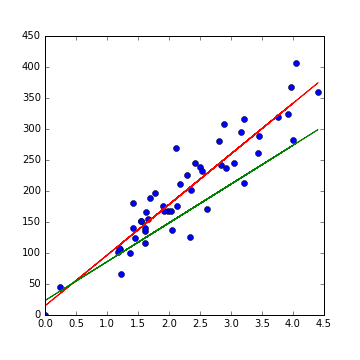
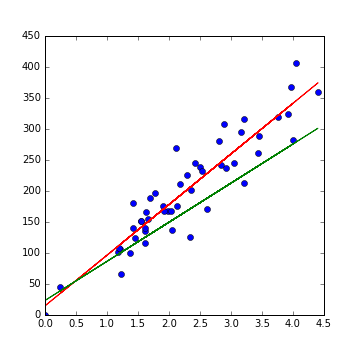
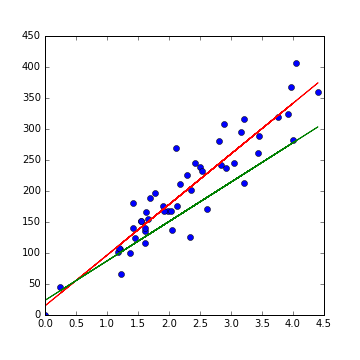
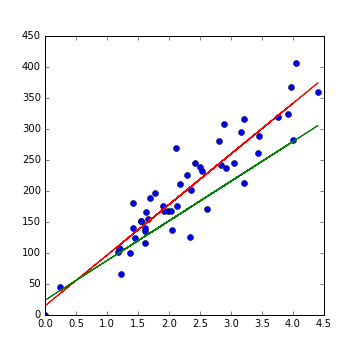
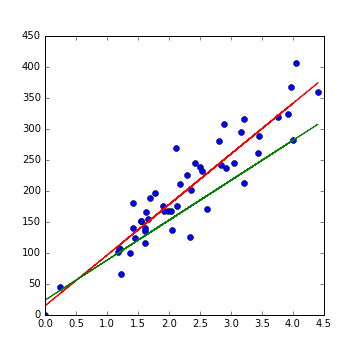
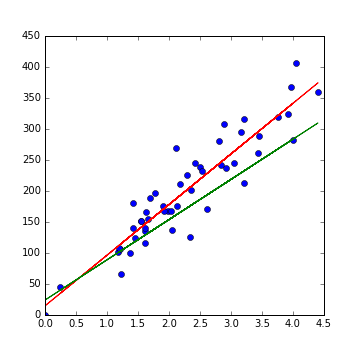
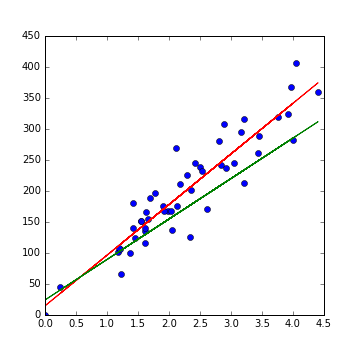
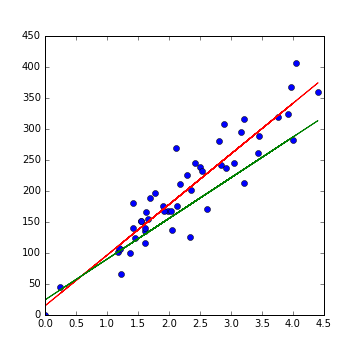
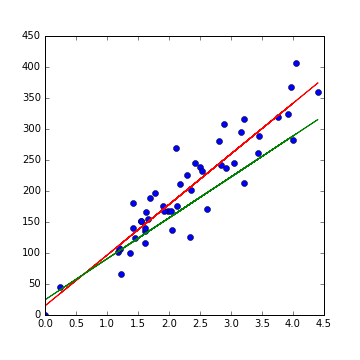
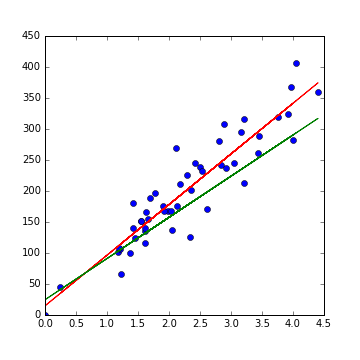
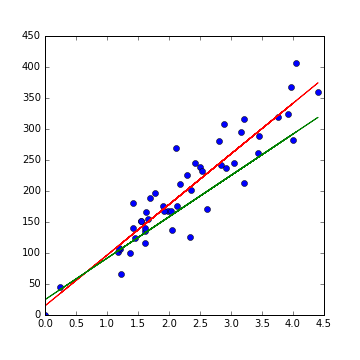
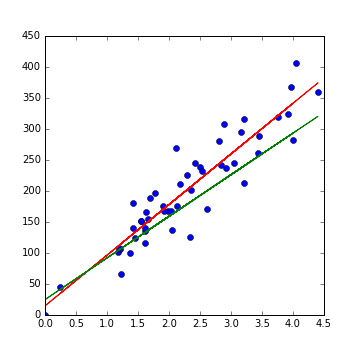
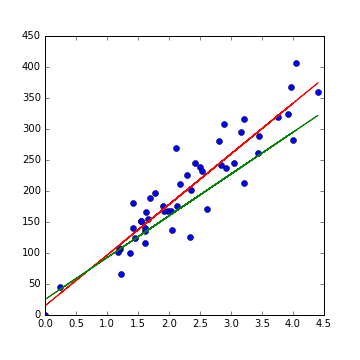
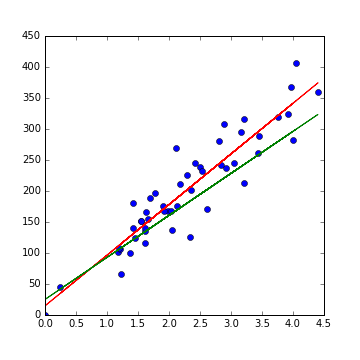
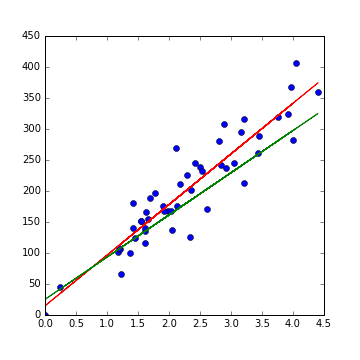
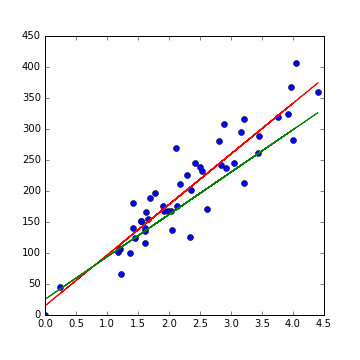
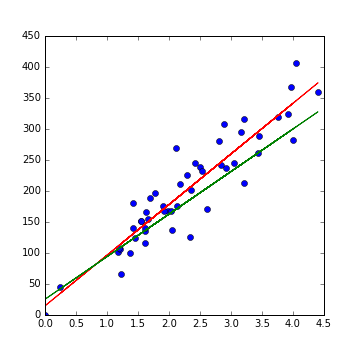
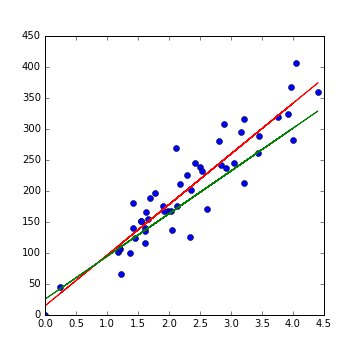
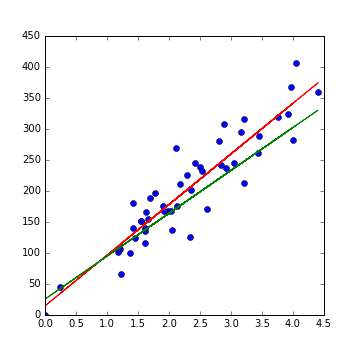
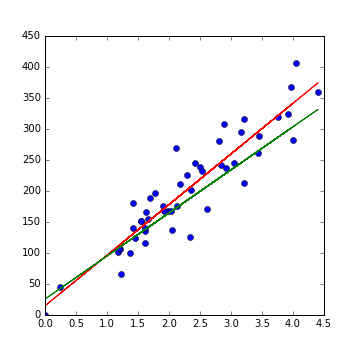
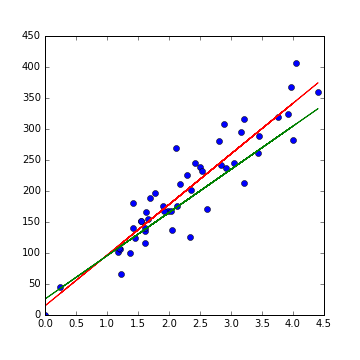
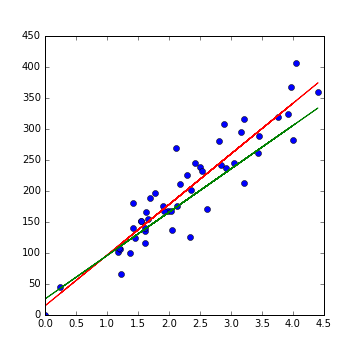
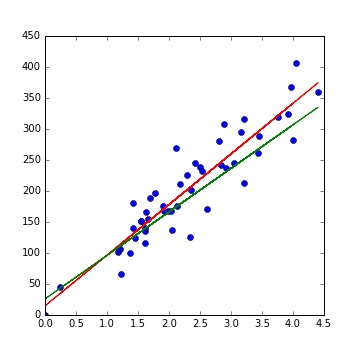
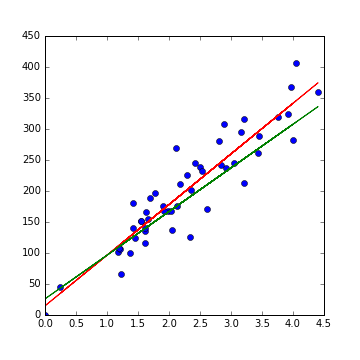
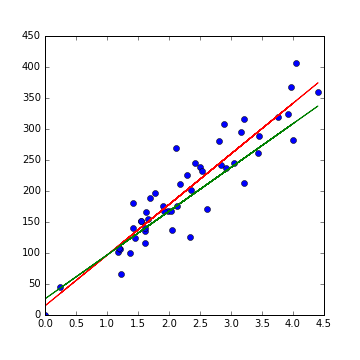
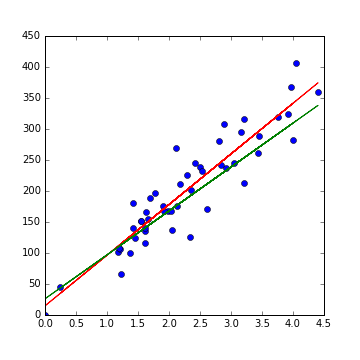
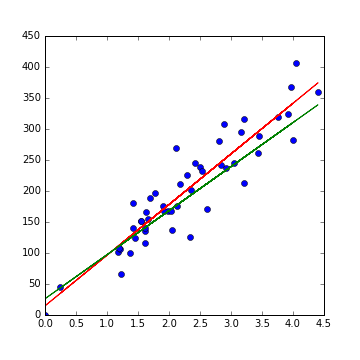
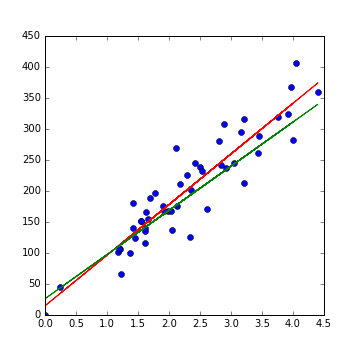
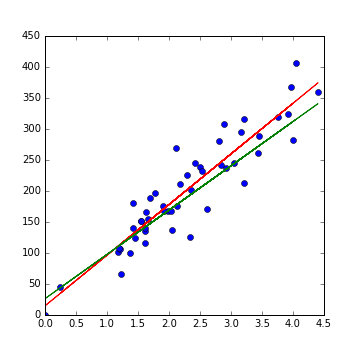
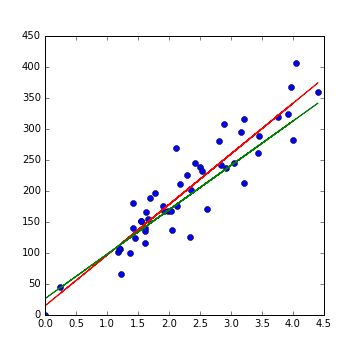
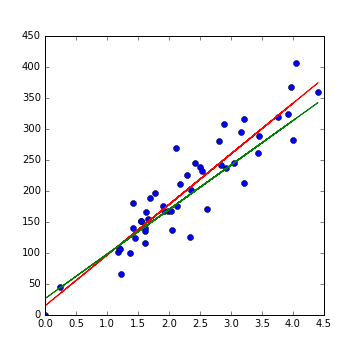
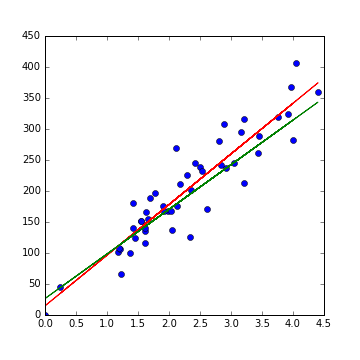
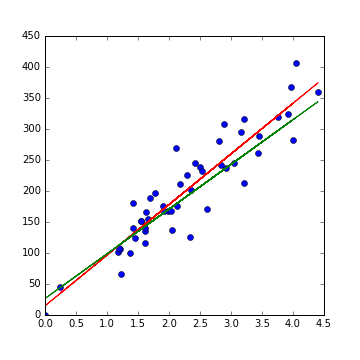
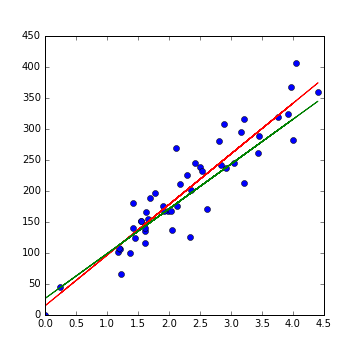
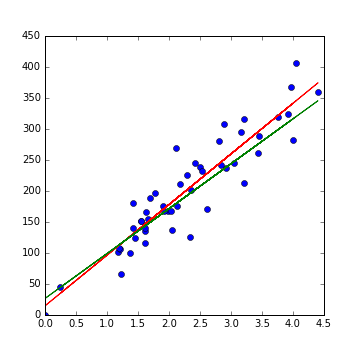
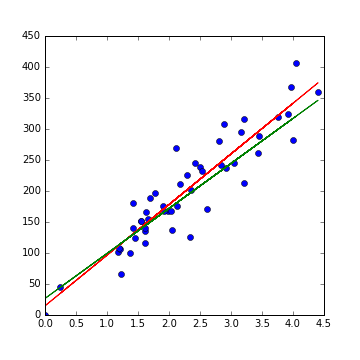
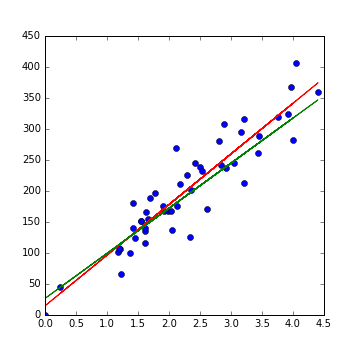
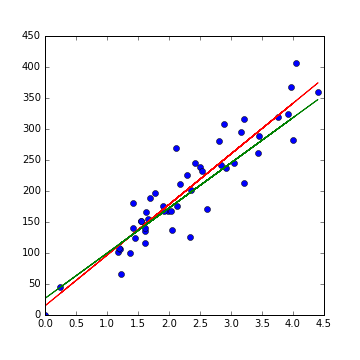
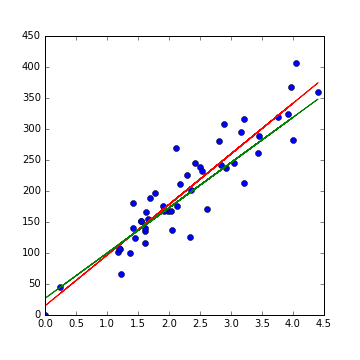
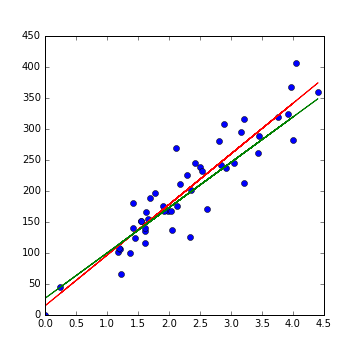
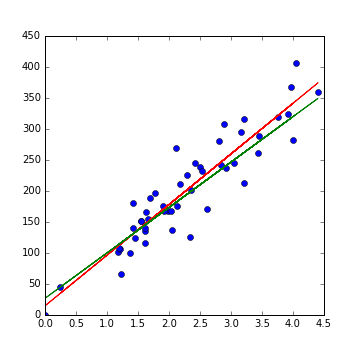
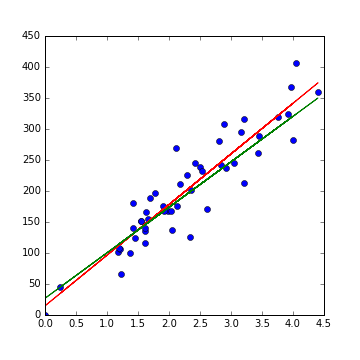
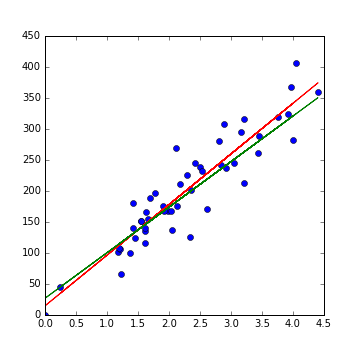
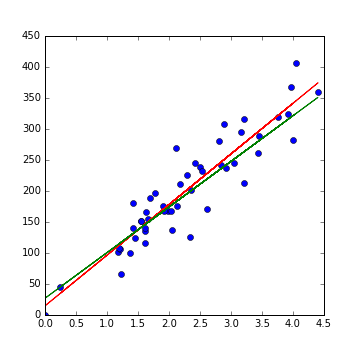
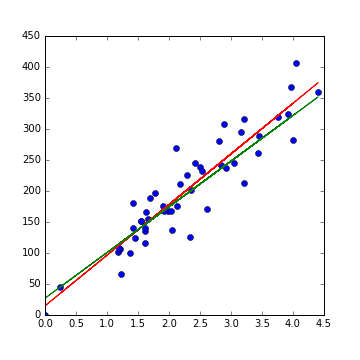
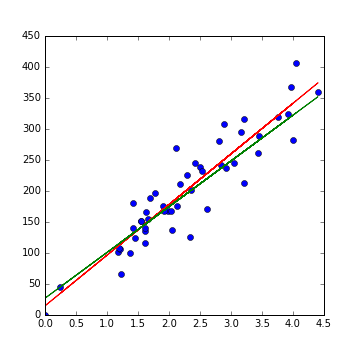
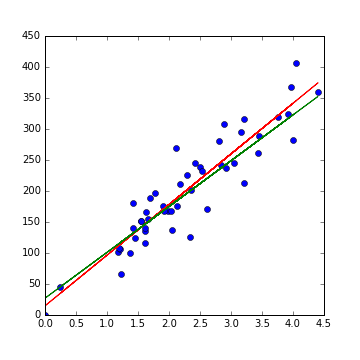
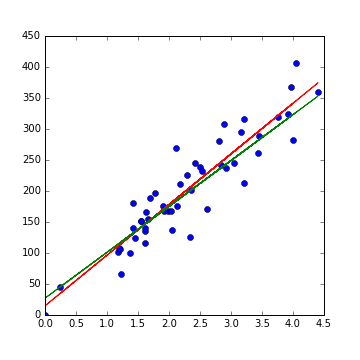
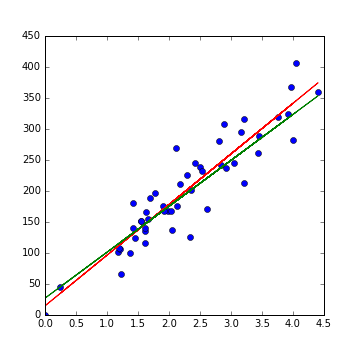
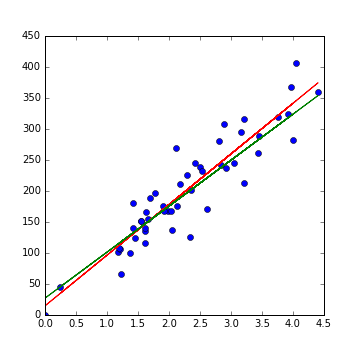
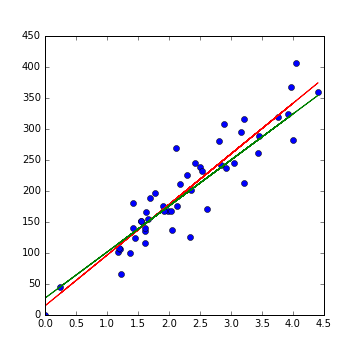
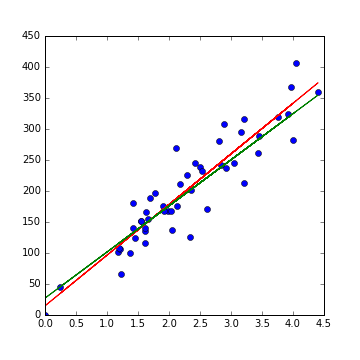
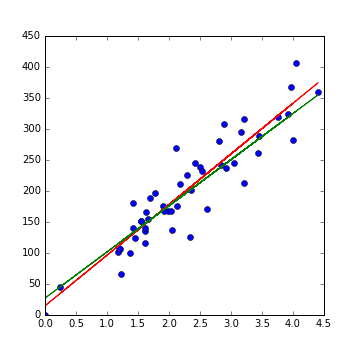

In [12]:
fig = plt.figure(figsize=(5, 5))
plt.plot(x, y, 'bo')
plt.plot(x, fit_func, 'r-')

line, = plt.plot([], [], 'g-')

def grad_anim_init():
    line.set_data([], [])
    
def grad_anim(i):
    step_y = theta_hist[i][1] * x[:, 0] + theta_hist[i][0]
    line.set_data(x, step_y)
    return (line, )

animation.FuncAnimation(fig, grad_anim, init_func=grad_anim_init, frames=len(theta_hist), interval=10)

Plot min J(theta) for each iteration to make sure that gradient descent is working

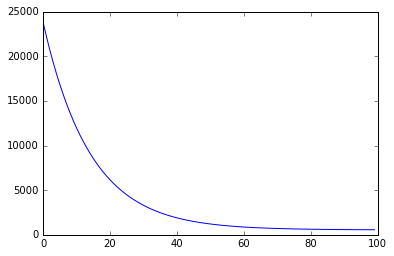

In [13]:
jx = np.arange(0, len(cost_hist))
plt.plot(jx, cost_hist, 'b-')

The batch gradient descent function is working because:
- $J(\theta{})$ decreases on each iteration
- it is possible to stop on 80th iteration, as you can see above